# IS319 - Deep Learning

## TP1 - Neural networks

The goal of this TP is to implement a simple feedforward neural network, but without the use of libraries like PyTorch or TensorFlow. We will only use NumPy.

In [461]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Activation function and its derivative

**(Question)** Implement the following activation function and its respective gradient (vector of partial derivatives). These should be applied element-wise to the input vector `a`.

In [462]:
def sigmoid(a):
    '''Return the element-wise sigmoid of the input vector.'''
    return 1/(1+np.exp(-a))


def d_sigmoid(a):
    '''Return the partial derivatives of the sigmoid function
    with respect to the input vector.'''
    # YOUR CODE HER
    return (1-sigmoid(a))*sigmoid(a)

In [463]:
a = np.random.randn(100)
assert np.all(sigmoid(a) >= 0.)
assert np.all(sigmoid(a) <= 1.)
assert sigmoid(0.) == 0.5
assert np.all(d_sigmoid(a) >= 0.)
assert np.all(d_sigmoid(a) <= 0.25)

## 2. Loss function and its derivative

**(Question)** Implement the following loss function and its respective gradient (vector of partial derivatives).

`y` and `d` correspond to predictions and ground-truth labels respectively. They are assumed to be be matrices of size `n_classes * n_samples`.

In [464]:
def squared_error(y, d):
    '''Return a scalar corresponding to the sum of squared errors.'''
    # The sum instead of mean will be more convenient for this TP
    # YOUR CODE HERE
    delta = y - d
    delta = np.power(delta, 2)
    loss = np.sum(delta)
    return loss

def d_squared_error(y, d):
    '''Return the vector of partial derivatives of the sum of
    squared errors with respect to the predictions.'''
    # YOUR CODE HERE
    return 2*(y-d)

In [465]:
y = np.random.randn(3, 100)
d = np.random.randn(3, 100)
assert squared_error(y, d) >= 0.
assert d_squared_error(y, d).shape == y.shape

## 3. Neural network architecture

We will implement a simple fully-connected neural network with **one hidden layer** and **one output layer**.

This neural network is defined by a number of inputs, a number of hidden units, and a number of output units.

The activation function will be sigmoid and the loss function will be the sum of squared errors, both implemented above.

**(Question)** Complete the class below to initialize the weights and biases randomly.

In [466]:
class NeuralNetwork():
    def __init__(self, n_input, n_hidden, n_output):
        '''Initialize a neural network with `n_input` input neurons,
        `n_hidden` hidden neurons and `n_output` output neurons.'''
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.init_weights()
        
    def init_weights(self):
        '''Initialize random weights with correct sizes in attributes `W1`, `b1`, `W2` and `b2`.'''
        # YOUR CODE HERE
        self.W1 = np.random.random((self.n_hidden, self.n_input))
        self.b1 = np.random.random((self.n_hidden,1))

        self.W2 = np.random.random((self.n_output, self.n_hidden))
        self.b2 = np.random.random((self.n_output,1))

In [467]:
nn = NeuralNetwork(64, 32, 3)
assert nn.W1.ndim == 2
assert nn.b1.ndim == 2
assert nn.W2.ndim == 2
assert nn.b2.ndim == 2

## 4. Forward pass

The forward pass is defined as:
$$\begin{align*}
\mathbf{h}_1 &= \sigma(\mathbf{a}_1) \quad\text{with}\quad \mathbf{a}_1 = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1 \\
\mathbf{y} &= \sigma(\mathbf{a}_2) \quad\text{with}\quad \mathbf{a}_2 = \mathbf{W}_2 \mathbf{h}_1 + \mathbf{b}_2
\end{align*}$$

**(Question)** Implement the forward pass for input examples `X`. Save intermediate results `a1`, `h1` and `a2` into attributes (as they will be needed for the backpropagation algorithm).

In [468]:
class NeuralNetwork(NeuralNetwork): # (the method will be added to the `NeuralNetwork` class)
    def forward(self, X):
        # YOUR CODE HERE
        self.a1 = (self.W1 @ X) + self.b1 #n_hidden,n
        self.h1 = sigmoid(self.a1) 
        self.a2 = (self.W2 @ self.h1) + self.b2 #n_output,n
        
        y = sigmoid(self.a2) #(n_output,n)

        return y
        

In [469]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
y = nn.forward(X)
assert y.shape == (3, 100)

**(Question)** Implement the function below to obtain a classification decision from the network. To do that, apply the forward pass, then choose the class corresponding to the maximum output value.

In [470]:
class NeuralNetwork(NeuralNetwork): # (the method will be added to the `NeuralNetwork` class)
    def predict(self, X):
        # YOUR CODE HERE
        d = self.forward(X)
        y = np.argmax(d,axis=0)
        return y
        

In [471]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
y = nn.predict(X)
assert y.shape == (100,)
assert np.any(y == 0) or np.any(y == 1) or np.any(y == 2)

## 5. Backward pass

**(Question)** Implement the backward pass for input examples `X`, ground-truth `d`, predictions `y`.

*Advice 1:* start by working on weights `d_W2` and `d_W1`, then work on the biases `d_b2` and `d_b1`.

*Advice 2:* keep track of the shapes of each partial derivatives using comments.

In [472]:
class NeuralNetwork(NeuralNetwork):
    def backward(self, X, y, d):
        '''Compute the partial derivatives of the loss function
        with respect to all weights of the neural network.
        Return these in variables `d_W1`, `d_b1`, `d_W2` and `d_b2`.'''
        # Backpropagation for the output layer
        # You should compute d_ey, d_ya2, d_a2w2 and finally delta2
        # Then, you can compute d_W2 and d_b2
        d_ey = y - d #(n_output,n)
        d_ya2 = d_sigmoid(self.a2) #(n_output,n)
        d_a2w2 = self.h1 #(n_hidden,n)
        delta2 = d_ey * d_ya2 #(n_output, n)
        # YOUR CODE HERE
        d_W2 = delta2 @ d_a2w2.T #(n_output, n_hidden)
        d_b2 = np.sum(delta2,axis=1).reshape(-1,1) #(n_ouput, 1)

        
        # Backpropagation for the hidden layer
        # You should compute d_h1a1 and finally delta1
        # Then, you can compute d_W1 and d_b1
        # YOUR CODE HERE
        dh1a1 = d_sigmoid(self.a1) #(n_hidden,n)
        delta1 = (delta2.T @ self.W2).T * dh1a1 # (n_hidden, n)
        d_W1 = delta1 @ X.T  #(n_hidden,n)
        d_b1 = np.sum(delta1,axis=1).reshape(-1,1) #(n_hidden,1)

        return d_W1, d_b1, d_W2, d_b2

In [473]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
d = np.random.randint(0, 2, size=(3, 100))
y = nn.forward(X)
loss = squared_error(y, d)
d_W1, d_b1, d_W2, d_b2 = nn.backward(X, y, d)
assert d_W1.shape == nn.W1.shape
assert d_b1.shape == nn.b1.shape
assert d_W2.shape == nn.W2.shape
assert d_b2.shape == nn.b2.shape

## 6. Weights update with gradient descent

**(Question)** Complete the following code to implement one iteration of the training process:
- Apply the forward pass on training data and compute the loss
- Apply backpropagation to compute the gradient of the loss with respect to the network parameters
- Apply gradient descent to update the network parameters

In [474]:
class NeuralNetwork(NeuralNetwork):
    def train_iteration(self, X, d, lr=1e-2):
        # Apply the forward pass and compute the loss
        # YOUR CODE HERE
        y_hat = self.forward(X)
        d_W1, d_b1, d_W2, d_b2 = self.backward(X,y_hat,d)
        self.W1 -= lr*d_W1
        self.W2 -= lr*d_W2
        self.b1 -= lr*d_b1
        self.b2 -= lr*d_b2

        loss = squared_error(d,y_hat)
        return loss, d_W1, d_b1, d_W2, d_b2

In [475]:
nn = NeuralNetwork(64, 32, 3)
X = np.random.randn(64, 100)
d = np.random.randint(0, 2, size=(3, 100))
loss = nn.train_iteration(X, d, lr=100)
assert loss[0] >= 0.

## 7. Mini-batch training loop

Now, we will implement the main training loop of our neural network.

We will use stochastic gradient descent with mini-batch: the weights will be updated by performing gradient descent on shuffled subsets of training data.

We will train the network for a number of epochs (an epoch is performed when the whole training set has been used with this mini-batch procedure).

**(Question)** Complete the code below to implement the training loop with minibatch stochastic gradient descent.

In [476]:
class NeuralNetwork(NeuralNetwork):
    def fit(self, X, d, batch_size, n_epochs=10, lr=1e-2):
        n_samples = X.shape[1]
        n_batches = (n_samples // batch_size) + 1
        weights = []
        d_weights = []
        for e in range(n_epochs):
            epoch_loss = 0.
            # Shuffle dataset
            permutation = np.random.permutation(n_samples)
            X, d = X[:, permutation], d[:, permutation]
            # Loop over each batch
            for b in range(0, n_samples, batch_size): # range(start, stop, step)
                # Grab the current batch in `X_batch` and `d_batch`
                # YOUR CODE HERE
                X_batch, y_batch = X[:,b:b+batch_size], d[:,b:b+batch_size]
                # Apply training iteration and update epoch loss
                # YOUR CODE HERE
                d_weight = self.train_iteration(X_batch,y_batch,lr)
                epoch_loss += d_weight[0]
                #losses.append(loss)
            d_weights.append(d_weight[1:])
            weights.append(self.W1)
            # Compute average epoch loss and print it
            #print(f'epoch {e} avg loss : {sum(losses)/len(losses)}')
            print(f'epoch {e} cumulative loss : {epoch_loss / n_samples}')
        return weights, d_weights

## 8. Train the network on the MNIST dataset

The MNIST dataset is composed of 70000 greyscale images of handwritten digits: 60000 images for training and 10000 for testing.

It is included in the `mnist.tgz` archive provided with this TP.

In [477]:
!tar xvzf ./mnist.tgz
images_train = np.load('./mnist-train-images.npy')
labels_train = np.load('./mnist-train-labels.npy')
images_test = np.load('./mnist-test-images.npy')
labels_test = np.load('./mnist-test-labels.npy')

x mnist-test-images.npy
x mnist-test-labels.npy
x mnist-train-images.npy
x mnist-train-labels.npy


**(Question)** Reshape the images into vectors and normalize the pixel values between 0 and 1. Convert the labels into one-hot vectors (*i.e.* vectors full of 0 and with only a 1 for the corresponding class). Store the results into `X_train`, `y_train`, `X_test` and `y_test` variables. Make sure to reshape to the following:
- Input data: `n_features x n_samples`
- Labels: `n_classes x n_samples`

In [478]:
# YOUR CODE HERE
X_train = np.load('mnist-train-images.npy')
y_train = np.load('mnist-train-labels.npy')
X_test = np.load('mnist-test-images.npy')
y_test = np.load('mnist-test-labels.npy')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [479]:
X_train = X_train.reshape( X_train.shape[1] * X_train.shape[2],X_train.shape[0])
X_test = X_test.reshape(X_test.shape[1] * X_test.shape[2],X_test.shape[0])

print(X_train.shape, X_test.shape)

(784, 60000) (784, 10000)


In [480]:
mask = np.isnan(X_test)
print(len(mask[mask == True]))

0


In [481]:
min_train, max_train = np.min(X_train), np.max(X_train)
min_test, max_test = np.min(X_test), np.max(X_test)
print(min_train,max_test,max_train,min_test)
X_train = (X_train - min_train) / (max_train - min_train)
X_test = (X_test - min_test) / (max_train - min_test)

0 255 255 0


In [482]:
print(np.max(y_train), np.max(y_test))

9 9


In [483]:
def to_categorical(y, num_classes):
    id_mat = np.eye(num_classes)
    one_hot_encoded = id_mat[y]
    return one_hot_encoded.T

In [484]:
y_train, y_test = to_categorical(y_train,10), to_categorical(y_test,10)

print(y_train.shape, y_test.shape)

(10, 60000) (10, 10000)


In [485]:
assert np.all(X_train >= 0.) and np.all(X_train <= 1.)
assert np.all(X_test >= 0.) and np.all(X_test <= 1.)
assert np.all(np.unique(y_train) == np.array([0., 1.])) 
assert np.all(np.unique(y_test) == np.array([0., 1.]))
assert np.all(np.sum(y_train, axis=0) == 1.)
assert np.all(np.sum(y_test, axis=0) == 1.)

**(Question)** Initialize a neural network for MNIST with 32 hidden units and train it for 10 epochs with a batch size of 512.

In [486]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(32,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))

model.compile(loss='mse', metrics='accuracy')

model.fit(X_train.T, y_train.T, epochs=10, batch_size=512)



Epoch 1/10
118/118 [==============================] - 1s 4ms/step - loss: 0.1166 - accuracy: 0.0982
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0901 - accuracy: 0.1062
Epoch 3/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0900 - accuracy: 0.1094
Epoch 4/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.1089
Epoch 5/10
 51/118 [===========>..................] - ETA: 0s - loss: 0.0900 - accuracy: 0.1086

118/118 [==============================] - 1s 5ms/step - loss: 0.0900 - accuracy: 0.1089
Epoch 6/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.1098
Epoch 7/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.1109
Epoch 8/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.1098
Epoch 9/10
118/118 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.1102
Epoch 10/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0900 - accuracy: 0.1102


In [494]:
# YOUR CODE HERE
nn = NeuralNetwork(n_input=X_train.shape[0],n_hidden=32,n_output=y_train.shape[0])
weights = nn.fit(X_train, y_train,n_epochs=10, batch_size=512, lr = 10)

C:\Users\ayman\AppData\Local\Temp\ipykernel_30984\3101076523.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a))


epoch 0 cumulative loss : 6.826738322185515
epoch 1 cumulative loss : 5.402744241750687
epoch 2 cumulative loss : 3.730417176455874
epoch 3 cumulative loss : 3.429533288056143
epoch 4 cumulative loss : 3.4295332499858078
epoch 5 cumulative loss : 3.284748058796457
epoch 6 cumulative loss : 2.6245666664098573
epoch 7 cumulative loss : 2.624566666409202
epoch 8 cumulative loss : 2.6245666664085436
epoch 9 cumulative loss : 2.6245666664078833


**(Question)** Compute the classification accuracy on the train and test sets. To do that, you can use the predict function and compare them with the original labels (*i.e.* without one-hot encoding).

In [502]:
print(y_train.T[1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [497]:
# YOUR CODE HERE
y_pred_train = nn.predict(X_train)
y_pred_test = nn.predict(X_test)

acc_train = 0
acc_test = 0

for i in range(len(y_pred_train)):
    if np.argmax(y_pred_train[i]) == np.argmax(y_train.T[i]):
        acc_train += 1

for i in range(len(y_pred_test)):
    if np.argmax(y_pred_test[i]) == np.argmax(y_test.T[i]):
        acc_test += 1

print("Training accuracy :", {acc_train / len(y_pred_train)})
print("Testing accuracy :", {acc_test / len(y_pred_test)})

C:\Users\ayman\AppData\Local\Temp\ipykernel_30984\3101076523.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-a))


Training accuracy : {0.09871666666666666}
Testing accuracy : {0.098}


**(Question)** Compute and plot the confusion matrix for the test set. Which are the most difficult classes? Show some examples of misclassified images.

In [504]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_tr = np.array([np.argmax(elt) for elt in y_train.T])
y_pred_tr = np.array([np.argmax(elt) for elt in y_pred_train])


y_pred_te = np.array([np.argmax(elt) for elt in y_pred_test])
y_te = np.array([np.argmax(elt) for elt in y_test.T])

print(y_te.shape)


(10000,)


Text(0.5, 1.0, 'Confusion Matrix')

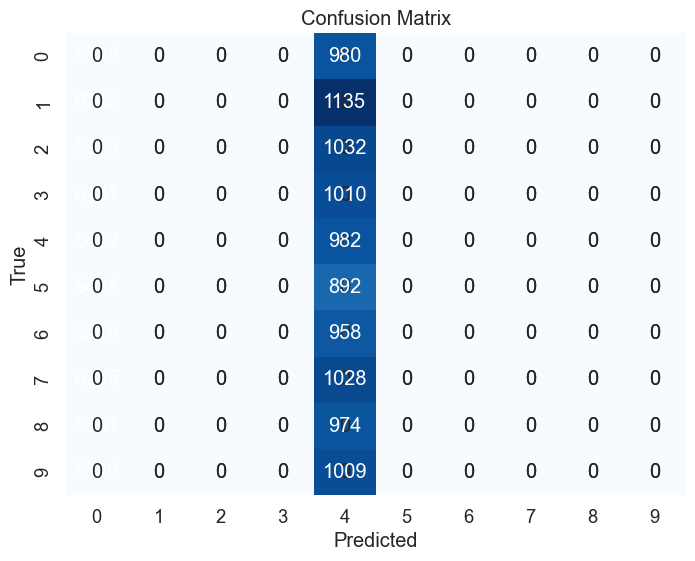

In [506]:

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size

confusion_tr = confusion_matrix(y_tr, y_pred_tr)
confusion_te = confusion_matrix(y_te, y_pred_test)

ax_tr = sns.heatmap(confusion_tr, annot=True, fmt='d', cmap='Blues', cbar=False)
ax_te = sns.heatmap(confusion_te, annot=True, fmt='d', cmap='Blues', cbar=False)


plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

**(Question)** Play around with hyperparameters of the model. What happens when the batch size if very small? And very large?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

YOUR ANSWER HERE

## 9. Extension to more than one hidden layer

**(Question)** Extend your neural network model to handle more than one hidden layer.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## 10. Extension to softmax and categorical cross-entropy

**(Question)** Extend your neural network model to use a softmax activation function for the output layer, and a categorical cross-entropy loss.
You can also experiment with the reLU activation for the hidden layer.

*Hint:* recall the partial derivatives formulation from logistic regression, and optimize the backpropagation for the output layer accordingly.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
X = np.random.randn(100,64).T
y = np.random.randint(0, 10, size=100)

y_onehot = np.eye(10)[y].T


model = NeuralNetwork(64, 32, 10) #initializes already W,b's randomly

alpha = 1.
model.W1 *= alpha
model.b1 *= alpha
..
y_pred = nn.softmax(model.forward(X))
loss = nn.categorical.crossentropy(y_pred, y_onehot)

#this makes the output as a probability distribution 
#usually to judge if our model is good or not, we compare the loss of the crossentropy with -log(1/K) with K the number of classes
#-log(1/K) is the crossentropy loss that a random mean classifier would gives us (probability 1/10 for each class : look the formula and replace)